# Generating the 'command' for changin directory of the data set

In [1]:
import os
print("Enter the directory/path of the dataset: ")
str1 = input()
directory=str1.replace('\\', '\\\\')
print("\nos.chdir('"+(directory)+"')")

Enter the directory/path of the dataset: 


os.chdir('')


# Copy and paste the 'generated command' down below

In [2]:
os.chdir('E:\\aBAC\\LTU sem 1\\python')
os.getcwd()

'E:\\aBAC\\LTU sem 1\\python'

# Start

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns

%matplotlib inline

In [4]:
strk=pd.read_csv("healthcare-dataset-stroke-data.csv")

# Checking the Data set which I loaded

In [5]:
strk.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Checking the null values inside the data set

In [6]:
strk.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# bmi = Body Mass Index

Dropping "bmi" column as it has most of the NA/NULL values.

In [7]:
strk.drop('bmi', axis=1, inplace=True)

In [8]:
strk.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [9]:
strk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


<AxesSubplot:xlabel='stroke', ylabel='count'>

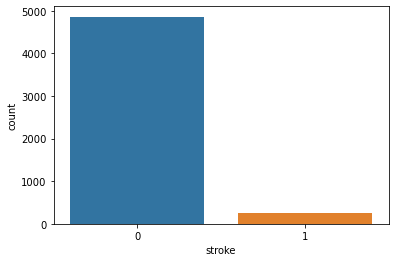

In [10]:
sns.countplot(x='stroke', data=strk)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

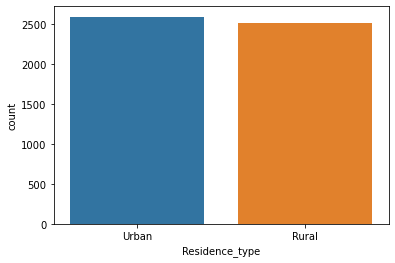

In [11]:
sns.countplot(x='Residence_type', data=strk)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

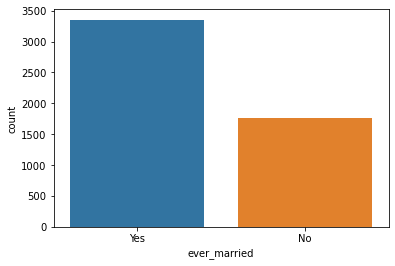

In [12]:
sns.countplot(x='ever_married', data=strk)

<AxesSubplot:xlabel='work_type', ylabel='count'>

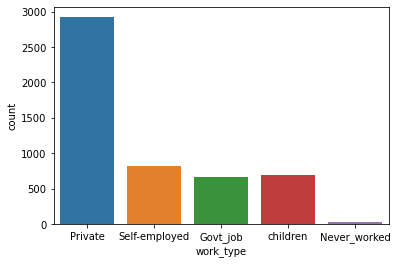

In [13]:
sns.countplot(x='work_type', data=strk)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

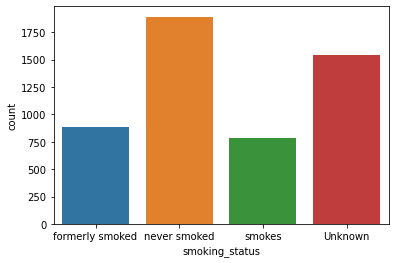

In [14]:
sns.countplot(x='smoking_status', data=strk)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

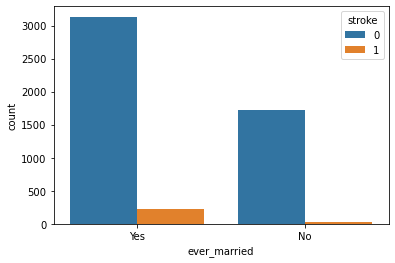

In [15]:
sns.countplot(x='ever_married', hue='stroke', data=strk)

<AxesSubplot:xlabel='gender', ylabel='count'>

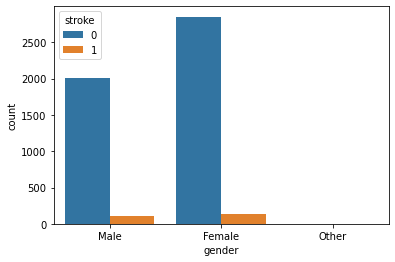

In [16]:
sns.countplot(x='gender', hue='stroke', data=strk)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

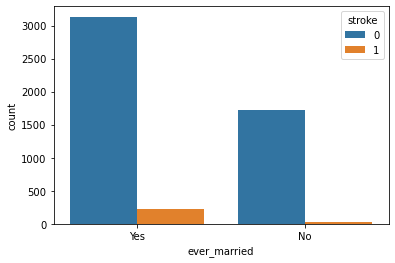

In [17]:
sns.countplot(x='ever_married', hue='stroke', data=strk)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

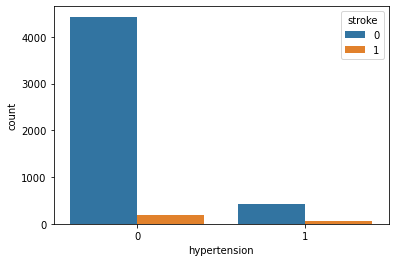

In [18]:
sns.countplot(x='hypertension', hue='stroke', data=strk)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

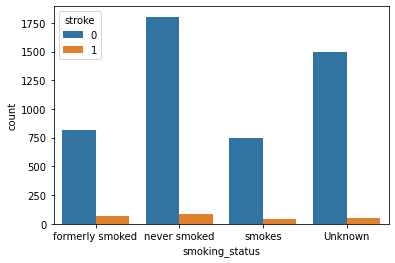

In [19]:
sns.countplot(x='smoking_status', hue='stroke', data=strk)

# Removing string values one by one columnwise, starting from 'gender' by using panda's 'get_dummies' function.

Removing string from 'gender'

In [20]:
pd.get_dummies(strk['gender']).head()

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Dropping the 'Other' column as we can predict the 'Other' value with the help of other two values.

# New column name: sex

In [21]:
sex = pd.get_dummies(strk['gender'])
sex.drop('Other', axis=1, inplace=True)
sex.head()

,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


Converting 'age' into int from float.

# New column name: int_age

In [22]:
int_age = strk["age"].astype(int)
int_age.head()

0    67
1    61
2    80
3    49
4    79
Name: age, dtype: int32

In [23]:
strk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [24]:
strk.rename(columns = {'age':'f_age'}, inplace=True)

Removing string from 'ever_married' column and then removing the first column 'No'

# New column name: em

In [25]:
em=pd.get_dummies(strk['ever_married'],drop_first=True)
em.head()

,Yes
0,1
1,1
2,1
3,1
4,1


Removing string from 'Residence_type' and also the first column 'Rural'

# New column name: rt

In [26]:
rt=pd.get_dummies(strk['Residence_type'],drop_first=True)
rt.head()

,Urban
0,1
1,0
2,0
3,1
4,0


Removing 'avg_glucose_level' column & smoking status column

In [27]:
strk.drop(['avg_glucose_level','smoking_status','work_type'], axis=1, inplace=True)

In [28]:
strk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5110 non-null   int64  
 1   gender          5110 non-null   object 
 2   f_age           5110 non-null   float64
 3   hypertension    5110 non-null   int64  
 4   heart_disease   5110 non-null   int64  
 5   ever_married    5110 non-null   object 
 6   Residence_type  5110 non-null   object 
 7   stroke          5110 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 319.5+ KB


# Merging all the new columns

In [29]:
strk=pd.concat([strk,sex,int_age,em,rt], axis=1)
strk.head()

,id,gender,f_age,hypertension,heart_disease,ever_married,Residence_type,stroke,Female,Male,age,Yes,Urban
0,9046,Male,67.0,0,1,Yes,Urban,1,0,1,67,1,1
1,51676,Female,61.0,0,0,Yes,Rural,1,1,0,61,1,0
2,31112,Male,80.0,0,1,Yes,Rural,1,0,1,80,1,0
3,60182,Female,49.0,0,0,Yes,Urban,1,1,0,49,1,1
4,1665,Female,79.0,1,0,Yes,Rural,1,1,0,79,1,0


# And now dropping the old columns associated with the new columns


In [30]:
strk.drop(['id','gender','f_age','ever_married','Residence_type'], axis=1, inplace=True)

# New Data set

In [31]:
strk.head()

,hypertension,heart_disease,stroke,Female,Male,age,Yes,Urban
0,0,1,1,0,1,67,1,1
1,0,0,1,1,0,61,1,0
2,0,1,1,0,1,80,1,0
3,0,0,1,1,0,49,1,1
4,1,0,1,1,0,79,1,0


# Renaming the column 'Yes' to 'Ever married'

In [32]:
strk.rename(columns = {'Yes':'Ever married'}, inplace=True)

In [33]:
strk.head()

,hypertension,heart_disease,stroke,Female,Male,age,Ever married,Urban
0,0,1,1,0,1,67,1,1
1,0,0,1,1,0,61,1,0
2,0,1,1,0,1,80,1,0
3,0,0,1,1,0,49,1,1
4,1,0,1,1,0,79,1,0


In [34]:
strk.rename(columns = {'hypertension':'Hypertension'}, inplace=True)
strk.rename(columns = {'heart_disease':'Heart disease'}, inplace=True)
strk.rename(columns = {'stroke':'Stroke'}, inplace=True)
strk.rename(columns = {'age':'Age'}, inplace=True)

In [35]:
strk.head(10)

,Hypertension,Heart disease,Stroke,Female,Male,Age,Ever married,Urban
0,0,1,1,0,1,67,1,1
1,0,0,1,1,0,61,1,0
2,0,1,1,0,1,80,1,0
3,0,0,1,1,0,49,1,1
4,1,0,1,1,0,79,1,0
5,0,0,1,0,1,81,1,1
6,1,1,1,0,1,74,1,0
7,0,0,1,1,0,69,0,1
8,0,0,1,1,0,59,1,0
9,0,0,1,1,0,78,1,1


Catagorize age into two section, age > 50 or not.

In [36]:
def change_age(cols):
    Age= cols[0]
    
    if Age>=50:
        return 1
    else:
        return 0

# Final data set after 'Data wrangling'


In [37]:
strk['Age']= strk[['Age']].apply(change_age, axis=1)
strk.head()

,Hypertension,Heart disease,Stroke,Female,Male,Age,Ever married,Urban
0,0,1,1,0,1,1,1,1
1,0,0,1,1,0,1,1,0
2,0,1,1,0,1,1,1,0
3,0,0,1,1,0,0,1,1
4,1,0,1,1,0,1,1,0


# Identifying dependent and independent variables

* dv= Dependent variable => Stroke
* iv= Independent variable => Rest of the data

In [38]:
dv = strk['Stroke']
iv = strk.drop('Stroke', axis=1)

In [39]:
dv.head()

0    1
1    1
2    1
3    1
4    1
Name: Stroke, dtype: int64

In [40]:
iv.head()

,Hypertension,Heart disease,Female,Male,Age,Ever married,Urban
0,0,1,0,1,1,1,1
1,0,0,1,0,1,1,0
2,0,1,0,1,1,1,0
3,0,0,1,0,0,1,1
4,1,0,1,0,1,1,0


<AxesSubplot:>

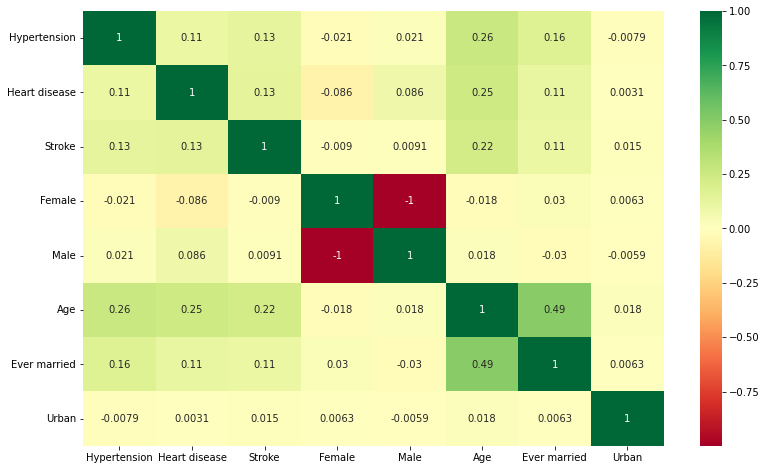

In [41]:
plt.subplots(figsize=(13,8))
sns.heatmap(strk.corr(), annot=True, cmap='RdYlGn')

# -------------------------------------------------------------------------------------------------------- # 

# Dividing the set into two different sets: test & train

In [42]:
from sklearn.model_selection import train_test_split
iv_train, iv_test, dv_train, dv_test = train_test_split(iv, dv, test_size=0.3, random_state=1)

In [43]:
iv_train.shape

(3577, 7)

In [44]:
iv_test.shape

(1533, 7)

In [45]:
iv.shape

(5110, 7)

In [46]:
dv.shape

(5110,)

# -------------------------------------------------------------------------------------------------------- 

# 1.Creating model by using a specific algorithm ( RF )

# Dividing data into attributes and lables

In [47]:
X = strk.iloc[:, 0:7].values
y = strk.iloc[:, 2].values

# Splitting data into two sets; for trainning and testing

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
X_train.shape

(4088, 7)

In [50]:
X_test.shape

(1022, 7)

In [51]:
y_train.shape

(4088,)

In [52]:
y_test.shape

(1022,)

# Feature scaling

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Trainning algorithm

In [70]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20000, random_state=0)
model=regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Checking the accuracy (RF) 

In [71]:
from sklearn.metrics import accuracy_score
acuRF=accuracy_score(y_test, y_pred)
print(acuRF)
print ("\nAccuracy: " + "{:.2%}".format(acuRF))

1.0

Accuracy: 100.00%


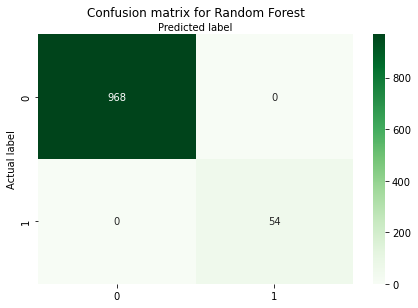

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

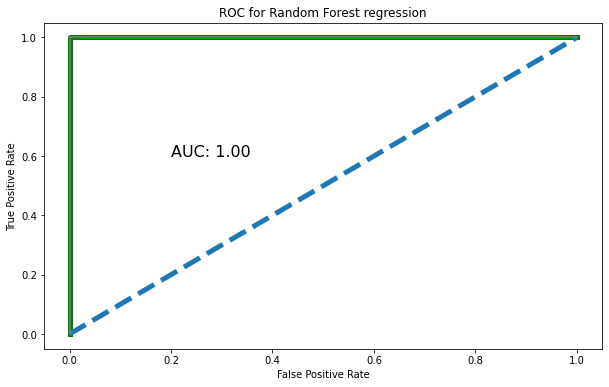

In [75]:
from sklearn.metrics import roc_auc_score,roc_curve

y_probabilities = model.predict(X_test)
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Random Forest regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()